<a href="https://colab.research.google.com/github/VoKhoiNhon/Ml2023/blob/main/Lab_6_20130355_VoKhoiNhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [12]:
from sklearn.utils.fixes import sklearn
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'
from sklearn import datasets
from sklearn import svm 
from sklearn import metrics as m
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# code
mnist = datasets.load_digits()
x_train, x_test, y_train, y_test = tts(mnist['data'], mnist['target'], test_size=0.3, random_state=1)
RF=['Random Forest']
RBF = ['RBF']
NB=['Navie Bayes']
mnist['data']


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 9 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 8 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 7 9 5 4 5 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

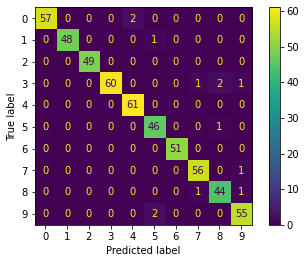

In [ ]:
#random Forest
clf=RandomForestClassifier() 
clf.fit(x_train,y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict, average='macro')
rf_rs = m.recall_score(y_test, y_predict, average='macro')
rf_fs = m.f1_score(y_test, y_predict, average='macro')
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 8 8 6 0 7 6 1 9 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 8 8 3 3 4 0 3 7 4
 7 0 2 7 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 9 3 9 0 2 9 9 2 3
 2 8 1 8 9 6 2 0 4 8 5 4 4 7 6 8 6 6 1 7 5 6 3 8 3 7 2 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 9 8 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 9 3
 0 8 7 7 0 3 3 3 6 3 3 2 9 2 6 9 0 4 2 2 7 9 2 6 7 6 8 7 1 9 3 4 0 6 4 8 5
 3 6 3 2 4 0 4 4 9 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 8 5 0 9 6 0 1 8 2 0 9
 5 6 8 0 5 0 9 2 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 8 6 9 8 8 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 9 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 2 9 2 9 8 7 0 1 3 8 9 8 1 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 8 4 8 9 5 4 5 2 5 3 3 3 5 1 8 7 6 8 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

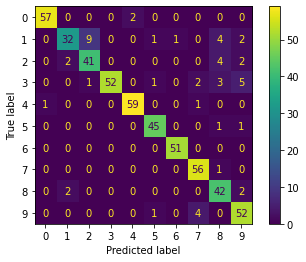

In [ ]:
#navie bayes
clf = MultinomialNB() 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict, average='macro')
nb_rs = m.recall_score(y_test, y_predict, average='macro')
nb_fs = m.f1_score(y_test, y_predict, average='macro')
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

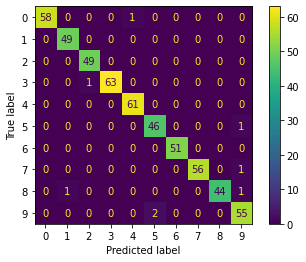

In [ ]:
#SVM
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [ ]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_rows([NB,RF,RBF])
print(t)
print(m.classification_report(y_test, y_predict))

+---------------+------+------+--------+------+
|               | Acc  | Pre  | Recall |  F1  |
+---------------+------+------+--------+------+
|  Navie Bayes  | 0.9  | 0.9  |  0.9   | 0.9  |
| Random Forest | 0.98 | 0.98 |  0.98  | 0.98 |
|      RBF      | 0.99 | 0.99 |  0.99  | 0.98 |
+---------------+------+------+--------+------+
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        49
           2       0.98      1.00      0.99        49
           3       1.00      0.98      0.99        64
           4       0.98      1.00      0.99        61
           5       0.96      0.98      0.97        47
           6       1.00      1.00      1.00        51
           7       1.00      0.98      0.99        57
           8       1.00      0.96      0.98        46
           9       0.95      0.96      0.96        57

    accuracy                           0.99       540
   macro avg  

#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



#2.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [32]:
#code
data= pd.read_csv('bank.csv')
sc= StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]=sc.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#2.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [33]:
#code
encoder = OneHotEncoder()
encoded_data =encoder.fit_transform(data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

data_encoded


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#2.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [35]:
#code
data_encoded['deposit']= data_encoded['deposit'].map({'yes':1, 'no':0})
x_train, x_test, y_train, y_test = tts(data_encoded.drop(['deposit'],axis=1), data_encoded['deposit'], test_size=0.3, random_state=1)
RF=['Random Forest']
NB=['Navie Bayes']
KB=['KBest']
data_encoded

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Accuracy: 0.7975515079128098
Precision: 0.7830950901180858
Recall: 0.7929515418502202
F1: 0.7879924953095685
[[1411  349]
 [ 329 1260]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1760
           1       0.78      0.79      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



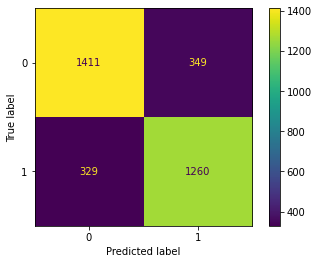

In [36]:
# decision Tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict)
tree_rs = m.recall_score(y_test, y_predict)
tree_fs = m.f1_score(y_test, y_predict)
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 1 0]
Accuracy: 0.8489101224246044
Precision: 0.8175953079178886
Recall: 0.8772813089993706
F1: 0.8463873709775349
[[1449  311]
 [ 195 1394]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



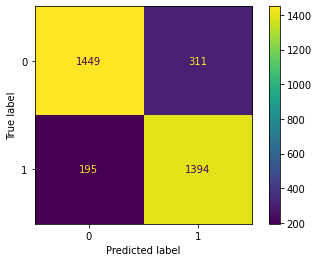

In [37]:
# Random forest
clf=RandomForestClassifier() 
clf.fit(x_train,y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict)
rf_rs = m.recall_score(y_test, y_predict)
rf_fs = m.f1_score(y_test, y_predict)
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 1 0]
Accuracy: 0.6754255001492983
Precision: 0.6611039794608472
Recall: 0.6482064191315292
F1: 0.6545916746107404
[[1232  528]
 [ 559 1030]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1760
           1       0.66      0.65      0.65      1589

    accuracy                           0.68      3349
   macro avg       0.67      0.67      0.67      3349
weighted avg       0.68      0.68      0.68      3349



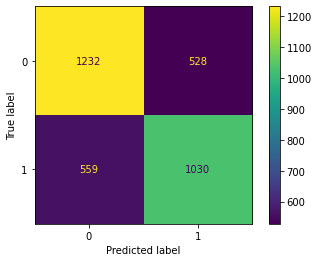

In [38]:
#Navie Bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict)
nb_rs = m.recall_score(y_test, y_predict)
nb_fs = m.f1_score(y_test, y_predict)
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

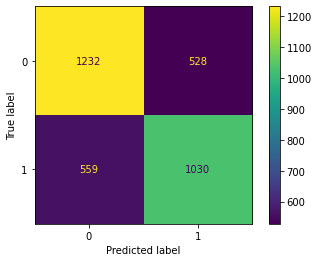

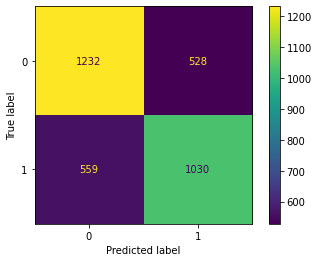

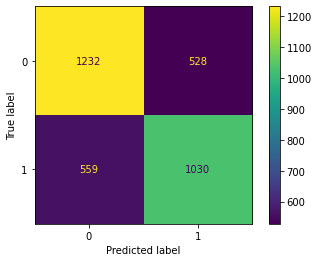

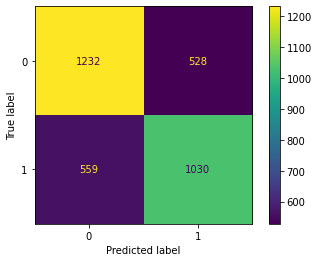

In [39]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

In [40]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1',])
t.add_rows([ KNN, Tree, NB, RF])
print(t)
print(m.classification_report(y_test, y_predict))

+---------------+------+------+--------+------+
|               | Acc  | Pre  | Recall |  F1  |
+---------------+------+------+--------+------+
|      KNN      | 0.78 | 0.78 |  0.75  | 0.77 |
|      Tree     | 0.8  | 0.78 |  0.79  | 0.79 |
|  Navie Bayes  | 0.68 | 0.66 |  0.65  | 0.65 |
| Random Forest | 0.85 | 0.82 |  0.88  | 0.85 |
+---------------+------+------+--------+------+
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1760
           1       0.66      0.65      0.65      1589

    accuracy                           0.68      3349
   macro avg       0.67      0.67      0.67      3349
weighted avg       0.68      0.68      0.68      3349



#2.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


[1 1 1 ... 1 1 1]
Accuracy: 0.4747685876381009
Precision: 0.4746117084826762
Recall: 1.0
F1: 0.6437107555195463
[[   1 1759]
 [   0 1589]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1760
           1       0.47      1.00      0.64      1589

    accuracy                           0.47      3349
   macro avg       0.74      0.50      0.32      3349
weighted avg       0.75      0.47      0.31      3349

+---------------+------+------+--------+------+
|               | Acc  | Pre  | Recall |  F1  |
+---------------+------+------+--------+------+
|      KNN      | 0.78 | 0.78 |  0.75  | 0.77 |
|      Tree     | 0.8  | 0.78 |  0.79  | 0.79 |
|  Navie Bayes  | 0.68 | 0.66 |  0.65  | 0.65 |
| Random Forest | 0.85 | 0.82 |  0.88  | 0.85 |
|     KBest     | 0.47 | 0.47 |  1.0   | 0.64 |
+---------------+------+------+--------+------+
              precision    recall  f1-score   support

           0       1.00      0.00      0.00    

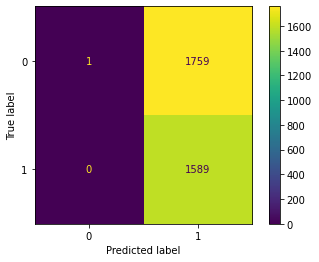

In [41]:
#code
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
clf = SelectKBest(chi2, k=40)
X_train_selected = clf.fit_transform(x_train, y_train)
X_test_selected = clf.transform(x_test)

ga = GaussianNB()
ga.fit(X_train_selected, y_train)
y_predict = ga.predict(X_test_selected)
print(y_predict)
ga_ac = m.accuracy_score(y_test, y_predict)
ga_ps = m.precision_score(y_test, y_predict)
ga_rs = m.recall_score(y_test, y_predict)
ga_fs = m.f1_score(y_test, y_predict)
KB.append(str(round(ga_ac,2)))
KB.append(str(round(ga_ps,2)))
KB.append(str(round(ga_rs,2)))
KB.append(str(round(ga_fs,2)))
print('Accuracy:',ga_ac)
print('Precision:',ga_ps)
print('Recall:',ga_rs)
print('F1:',ga_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

t.add_rows([KB])
print(t)
print(m.classification_report(y_test, y_predict))

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [42]:
# code
dataset = pd.read_csv('creditcard.csv')
X = dataset.drop('Class', axis=1)
y = dataset['Class']
#Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = tts(X_scaled, y,test_size=0.03,train_size=0.22, random_state=1)
RF=['Random Forest']
NB=['Navie Bayes']

Accuracy: 0.9989467524868344
Precision: 0.8123241294407316
Recall: 0.8842637671751596
F1: 0.8445638267555162
[[8526    6]
 [   3   10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.62      0.77      0.69        13

    accuracy                           1.00      8545
   macro avg       0.81      0.88      0.84      8545
weighted avg       1.00      1.00      1.00      8545



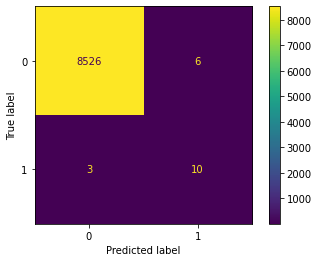

In [43]:
#Linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Linear = ['Linear']
Linear.append(str(round(svm_ac,2)))
Linear.append(str(round(svm_ps,2)))
Linear.append(str(round(svm_rs,2)))
Linear.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

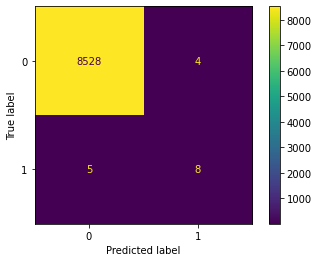

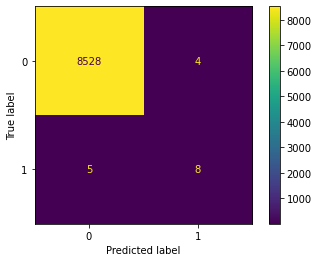

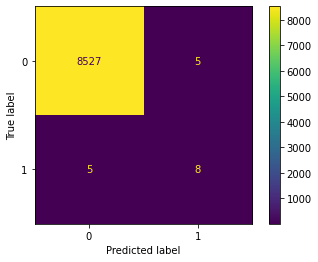

In [44]:
#poly
d_range= range(3,6,1)
acc=[]
pre=[]
re=[]
f=[]
Poly=['Poly']
for d in d_range:
  clf = svm.SVC(kernel='poly', degree=d)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  acc.append(m.accuracy_score(y_test, y_predict))
  pre.append(m.precision_score(y_test, y_predict, average='macro'))
  re.append(m.recall_score(y_test, y_predict, average='macro'))
  f.append(m.f1_score(y_test, y_predict, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
max_index = acc.index(max(acc))
Poly.append(round(acc[max_index],2))
Poly.append(round(pre[max_index],2))
Poly.append(round(re[max_index],2))
Poly.append(round(f[max_index],2))

[0 0 0 ... 0 0 0]
Accuracy: 0.9982445874780573
Precision: 0.7138754458529397
Recall: 0.7303004075155974
F1: 0.7217826746631764
[[8524    8]
 [   7    6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.43      0.46      0.44        13

    accuracy                           1.00      8545
   macro avg       0.71      0.73      0.72      8545
weighted avg       1.00      1.00      1.00      8545



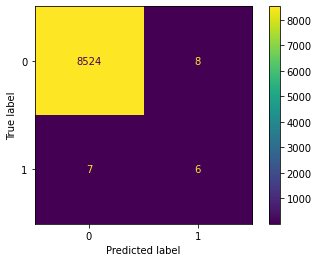

In [45]:
clf = svm.SVC(kernel='sigmoid') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
Sigmoid = ['Sigmoid']
Sigmoid.append(str(round(svm_ac,3)))
Sigmoid.append(str(round(svm_ps,3)))
Sigmoid.append(str(round(svm_rs,3)))
Sigmoid.append(str(round(svm_fs,3)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 0 0]
Accuracy: 0.9992978349912229
Precision: 0.9441515672185775
Recall: 0.8076337047856035
F1: 0.863460596118201
[[8531    1]
 [   5    8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.89      0.62      0.73        13

    accuracy                           1.00      8545
   macro avg       0.94      0.81      0.86      8545
weighted avg       1.00      1.00      1.00      8545



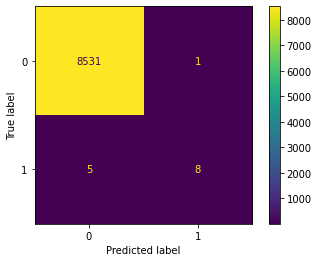

In [46]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test)
print(y_predict)
svm_ac = m.accuracy_score(y_test, y_predict)
RBF = ['RBF']
svm_ps = m.precision_score(y_test, y_predict, average='macro')
svm_rs = m.recall_score(y_test, y_predict, average='macro')
svm_fs = m.f1_score(y_test, y_predict, average='macro')
RBF.append(str(round(svm_ac,2)))
RBF.append(str(round(svm_ps,2)))
RBF.append(str(round(svm_rs,2)))
RBF.append(str(round(svm_fs,2)))
print('Accuracy:',svm_ac)
print('Precision:',svm_ps)
print('Recall:',svm_rs)
print('F1:',svm_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

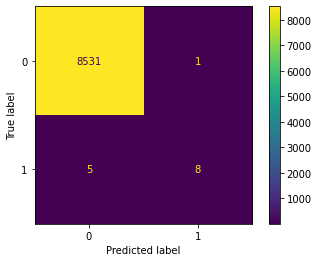

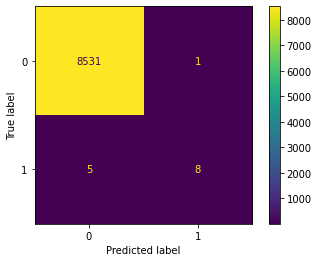

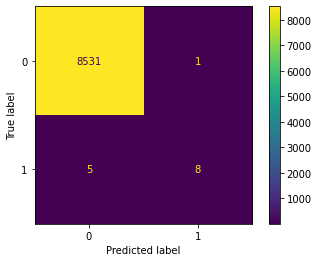

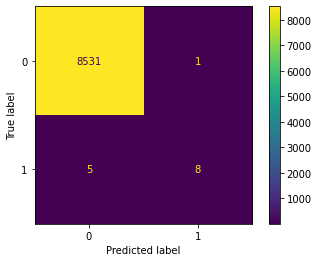

In [47]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = knc(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred, average='macro'))
  recall.append( m.recall_score(y_test, pred, average='macro'))
  f1.append(m.f1_score(y_test, pred, average='macro'))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
KNN = ['KNN', str(round(acc[3],2)), str(round(prec[3],2)), str(round(recall[3],2)), str(round(f1[3],2))]

Accuracy: 0.9988297249853716
Precision: 0.8178302831454929
Recall: 0.7689963576039525
F1: 0.7913736864721278
[[8528    4]
 [   6    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.64      0.54      0.58        13

    accuracy                           1.00      8545
   macro avg       0.82      0.77      0.79      8545
weighted avg       1.00      1.00      1.00      8545



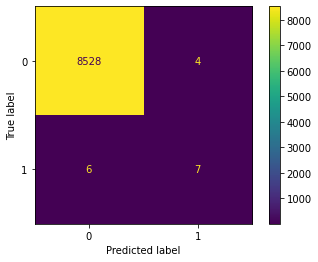

In [48]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train) 
y_predict = logistic.predict(x_test)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
Logistic =['Logistic Regression', str(round(ac,2)), str(round(ps,2)), str(round(rs,2)), str(round(fs,2))]
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 0 0]
Accuracy: 0.9991808074897601
Precision: 0.75
Recall: 0.6923076923076923
F1: 0.7199999999999999
[[8529    3]
 [   4    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.75      0.69      0.72        13

    accuracy                           1.00      8545
   macro avg       0.87      0.85      0.86      8545
weighted avg       1.00      1.00      1.00      8545



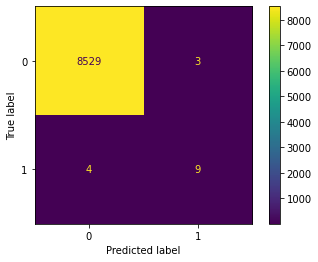

In [49]:
# Random forest
clf=RandomForestClassifier() 
clf.fit(x_train,y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
rf_ac = m.accuracy_score(y_test, y_predict)
rf_ps = m.precision_score(y_test, y_predict)
rf_rs = m.recall_score(y_test, y_predict)
rf_fs = m.f1_score(y_test, y_predict)
RF.append(str(round(rf_ac,2)))
RF.append(str(round(rf_ps,2)))
RF.append(str(round(rf_rs,2)))
RF.append(str(round(rf_fs,2)))
print('Accuracy:',rf_ac)
print('Precision:',rf_ps)
print('Recall:',rf_rs)
print('F1:',rf_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

[0 0 0 ... 0 0 0]
Accuracy: 0.9985956699824459
Precision: 0.5384615384615384
Recall: 0.5384615384615384
F1: 0.5384615384615384
[[8526    6]
 [   6    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.54      0.54      0.54        13

    accuracy                           1.00      8545
   macro avg       0.77      0.77      0.77      8545
weighted avg       1.00      1.00      1.00      8545



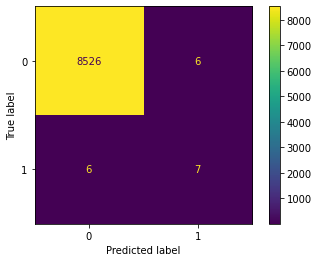

In [50]:
#Navie Bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train) 
y_predict = clf.predict(x_test) 
print(y_predict)
nb_ac = m.accuracy_score(y_test, y_predict)
nb_ps = m.precision_score(y_test, y_predict)
nb_rs = m.recall_score(y_test, y_predict)
nb_fs = m.f1_score(y_test, y_predict)
NB.append(str(round(nb_ac,2)))
NB.append(str(round(nb_ps,2)))
NB.append(str(round(nb_rs,2)))
NB.append(str(round(nb_fs,2)))
print('Accuracy:',nb_ac)
print('Precision:',nb_ps)
print('Recall:',nb_rs)
print('F1:',nb_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

Accuracy: 0.9985956699824459
Precision: 0.7688791517905442
Recall: 0.7688791517905442
F1: 0.7688791517905442
[[8526    6]
 [   6    7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.54      0.54      0.54        13

    accuracy                           1.00      8545
   macro avg       0.77      0.77      0.77      8545
weighted avg       1.00      1.00      1.00      8545



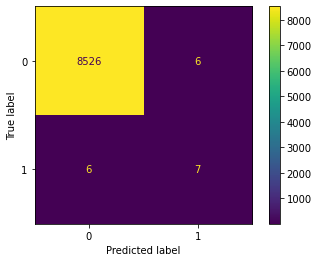

In [51]:
#tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tree_ac = m.accuracy_score(y_test, y_predict)
tree_ps = m.precision_score(y_test, y_predict, average='macro')
tree_rs = m.recall_score(y_test, y_predict, average='macro')
tree_fs = m.f1_score(y_test, y_predict, average='macro')
Tree =['Tree', str(round(tree_ac,2)),str(round(tree_ps,2)),str(round(tree_rs,2)),str(round(tree_fs,2))]
print('Accuracy:',tree_ac)
print('Precision:',tree_ps)
print('Recall:',tree_rs)
print('F1:',tree_fs)
print(m.confusion_matrix(y_test, y_predict))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print(m.classification_report(y_test,y_predict))

In [52]:
t = PrettyTable([' ', 'Acc', 'Pre', 'Recall', 'F1'])
t.add_rows([Logistic, KNN, Tree, Linear, Poly, Sigmoid, RBF,NB,RF ])
print(t)
print(m.classification_report(y_test, y_predict))

+---------------------+-------+-------+--------+-------+
|                     |  Acc  |  Pre  | Recall |   F1  |
+---------------------+-------+-------+--------+-------+
| Logistic Regression |  1.0  |  0.82 |  0.77  |  0.79 |
|         KNN         |  1.0  |  0.82 |  0.85  |  0.83 |
|         Tree        |  1.0  |  0.77 |  0.77  |  0.77 |
|        Linear       |  1.0  |  0.81 |  0.88  |  0.84 |
|         Poly        |  1.0  |  0.83 |  0.81  |  0.82 |
|       Sigmoid       | 0.998 | 0.714 |  0.73  | 0.722 |
|         RBF         |  1.0  |  0.94 |  0.81  |  0.86 |
|     Navie Bayes     |  1.0  |  0.54 |  0.54  |  0.54 |
|    Random Forest    |  1.0  |  0.75 |  0.69  |  0.72 |
+---------------------+-------+-------+--------+-------+
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8532
           1       0.54      0.54      0.54        13

    accuracy                           1.00      8545
   macro avg       0.77      0.77      0.

#Finally,
Save a copy in your Github. Remember renaming the notebook.